In [ ]:
!pip install opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 MB 19.1 MB/s eta 0:00:00


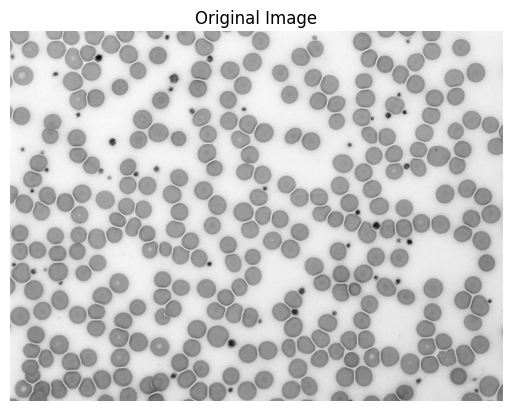

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, feature
from skimage.feature import blob_log, blob_dog, hog


image_path = "/content/Picture1.jpg"
image = io.imread(image_path, as_gray=True)

plt.imshow(image, cmap="gray")
plt.title("Original Image")
plt.axis("off")
plt.show()

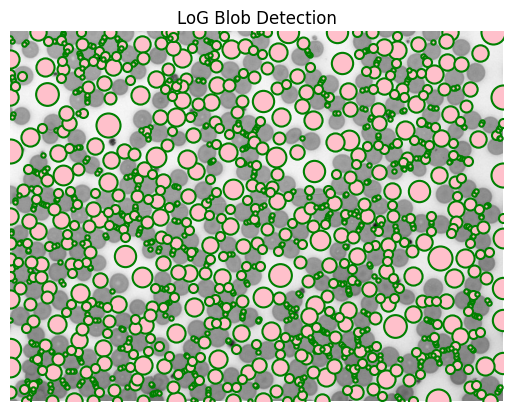

In [ ]:
from scipy.ndimage import gaussian_laplace
log_blobs = blob_log(image, max_sigma=30, num_sigma=10, threshold=0.05)
plt.imshow(image, cmap="gray")
plt.title("LoG Blob Detection")
plt.axis("off")

for blob in log_blobs:
    y, x, r = blob
    plt.scatter(x, y, s=r*10, edgecolors="green", facecolors="pink", linewidth=1.5)

plt.show()

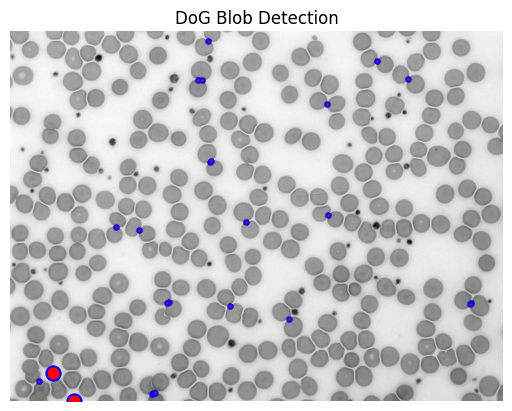

In [ ]:
dog_blobs = blob_dog(image, max_sigma=30, threshold=0.1)
plt.imshow(image, cmap="gray")
plt.title("DoG Blob Detection")
plt.axis("off")

for blob in dog_blobs:
    y, x, r = blob
    plt.scatter(x, y, s=r*10, edgecolors="blue", facecolors="red", linewidth=1.5)

plt.show()

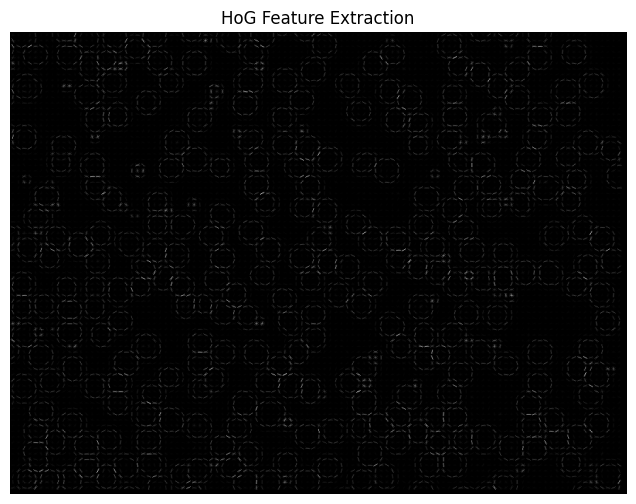

In [ ]:
hog_features, hog_image = hog(image, visualize=True)
plt.figure(figsize=(8, 6))
plt.imshow(hog_image, cmap="gray")
plt.title("HoG Feature Extraction")
plt.axis("off")
plt.show()

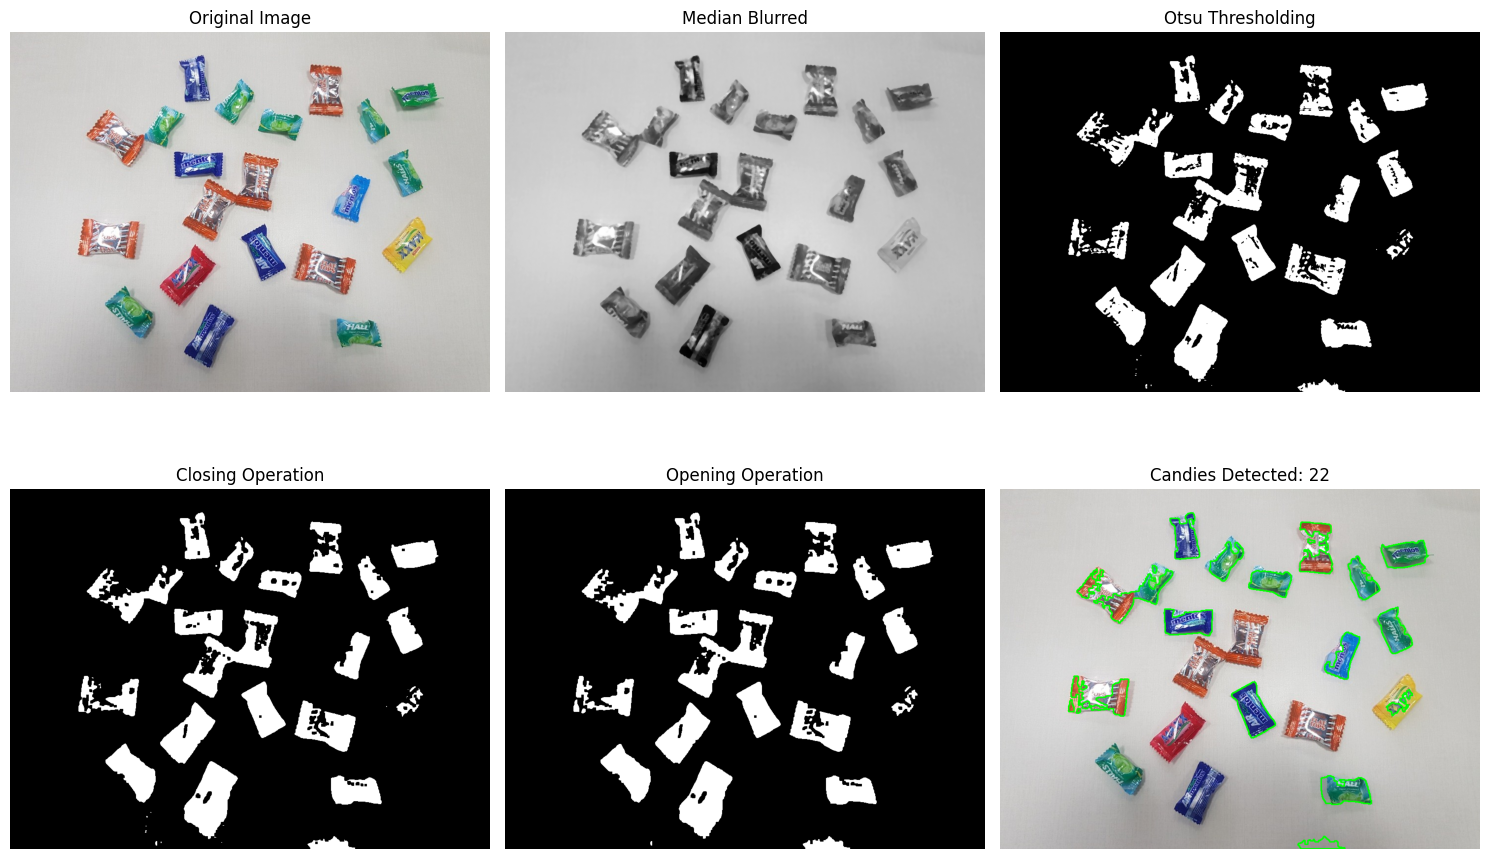

Total number of candies: 22


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def count_candies(image_path):
    # Read the image
    candy_img = cv2.imread(image_path)

    if candy_img is None:
        print("Error: Could not read the image. Please check the file path.")
        return

    # Convert to grayscale
    gray = cv2.cvtColor(candy_img, cv2.COLOR_BGR2GRAY)

    # Enhanced preprocessing
    # Use median blur instead of Gaussian to reduce noise while preserving edges
    blurred = cv2.medianBlur(gray, 5)

    # Otsu's thresholding instead of adaptive
    _, thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # Morphological operations
    kernel = np.ones((3, 3), np.uint8)

    # Closing to fill small holes
    closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=2)

    # Opening to remove small noise
    opened = cv2.morphologyEx(closed, cv2.MORPH_OPEN, kernel, iterations=1)

    # Find contours
    contours, _ = cv2.findContours(opened, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Filter contours
    min_area = 50  # Minimum area for a candy
    max_area = 5000  # Maximum area for a candy

    candy_contours = [cnt for cnt in contours if min_area < cv2.contourArea(cnt) < max_area]

    # Count and draw candies
    candy_count = len(candy_contours)
    candy_img_copy = candy_img.copy()
    cv2.drawContours(candy_img_copy, candy_contours, -1, (0, 255, 0), 2)

    # Visualization
    fig, axs = plt.subplots(2, 3, figsize=(15, 10))

    axs[0, 0].imshow(cv2.cvtColor(candy_img, cv2.COLOR_BGR2RGB))
    axs[0, 0].set_title("Original Image")
    axs[0, 0].axis("off")

    axs[0, 1].imshow(blurred, cmap="gray")
    axs[0, 1].set_title("Median Blurred")
    axs[0, 1].axis("off")

    axs[0, 2].imshow(thresh, cmap="gray")
    axs[0, 2].set_title("Otsu Thresholding")
    axs[0, 2].axis("off")

    axs[1, 0].imshow(closed, cmap="gray")
    axs[1, 0].set_title("Closing Operation")
    axs[1, 0].axis("off")

    axs[1, 1].imshow(opened, cmap="gray")
    axs[1, 1].set_title("Opening Operation")
    axs[1, 1].axis("off")

    axs[1, 2].imshow(cv2.cvtColor(candy_img_copy, cv2.COLOR_BGR2RGB))
    axs[1, 2].set_title(f"Candies Detected: {candy_count}")
    axs[1, 2].axis("off")

    plt.tight_layout()
    plt.show()

    return candy_count

# Usage
image_path = "/content/Picture2.jpg"
total_candies = count_candies(image_path)
print(f"Total number of candies: {total_candies}")

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

image_path = "/content/Picture3.png"

img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

if img is None:
    print(f"Error: Could not load image at {image_path}")
else:
    print("Original Grayscale Image")
    cv2_imshow(img)

    blurred = cv2.GaussianBlur(img, (5, 5), 0)
    print("Blurred Image")
    cv2_imshow(blurred)

    equalized = cv2.equalizeHist(blurred)
    print("Equalized Image")
    cv2_imshow(equalized)

    _, thresh = cv2.threshold(equalized, 127, 255, cv2.THRESH_BINARY)
    print("Thresholded Image")
    cv2_imshow(thresh)

    params = cv2.SimpleBlobDetector_Params()
    params.filterByArea = True
    params.minArea = 10
    params.maxArea = 100

    params.filterByCircularity = True
    params.minCircularity = 0.5

    params.filterByConvexity = True
    params.minConvexity = 0.8

    params.filterByInertia = True
    params.minInertiaRatio = 0.6

    params.filterByColor = True
    params.blobColor = 0

    detector = cv2.SimpleBlobDetector_create(params)
    keypoints = detector.detect(equalized)

    img_color = cv2.imread(image_path)
    img_with_blobs = cv2.drawKeypoints(img_color, keypoints, img_color.copy(), (0, 0, 255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    print("Image with Blobs")
    cv2_imshow(img_with_blobs)

Output hidden; open in https://colab.research.google.com to view.

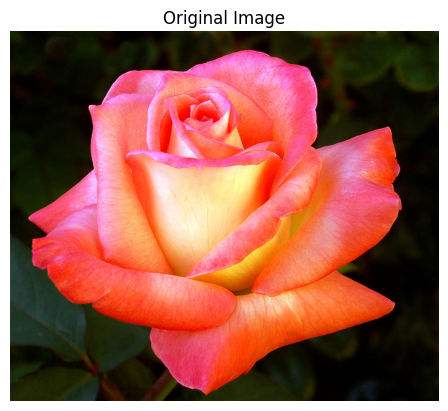

In [ ]:

import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, filters, exposure
from skimage.transform import rescale, resize
from skimage.restoration import denoise_bilateral

image_path = "/content/Picture6.jpg"
image = io.imread(image_path)
plt.imshow(image)
plt.title("Original Image")
plt.axis("off")
plt.show()


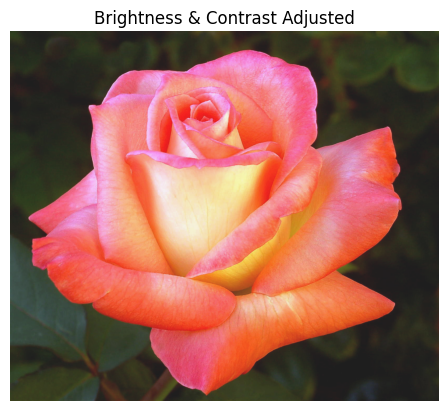

In [ ]:
def adjust_brightness_contrast(image, alpha=0.85, beta=30):
    adjusted = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)
    return adjusted

bright_contrast = adjust_brightness_contrast(image)

plt.imshow(bright_contrast)
plt.title("Brightness & Contrast Adjusted")
plt.axis("off")
plt.show()


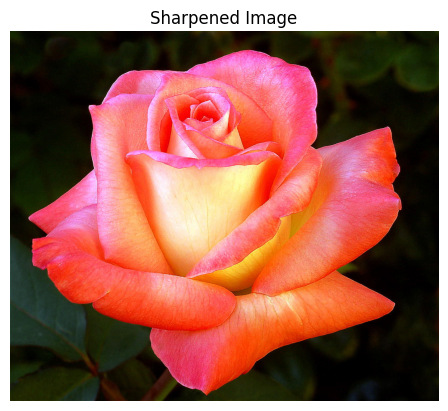

In [ ]:
kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])  # Sharpening kernel
sharpened = cv2.filter2D(image, -1, kernel)

plt.imshow(sharpened)
plt.title("Sharpened Image")
plt.axis("off")
plt.show()

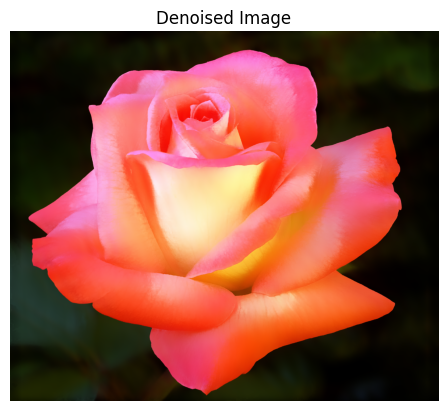

In [ ]:
denoised = denoise_bilateral(image, sigma_color=0.05, sigma_spatial=15, channel_axis=-1)

plt.imshow(denoised)
plt.title("Denoised Image")
plt.axis("off")
plt.show()

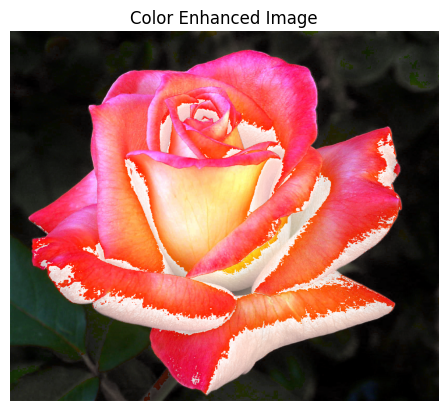

In [ ]:
hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
hsv[..., 1] = hsv[..., 1] * 1.2  # Increase saturation
color_enhanced = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)

plt.imshow(color_enhanced)
plt.title("Color Enhanced Image")
plt.axis("off")
plt.show()


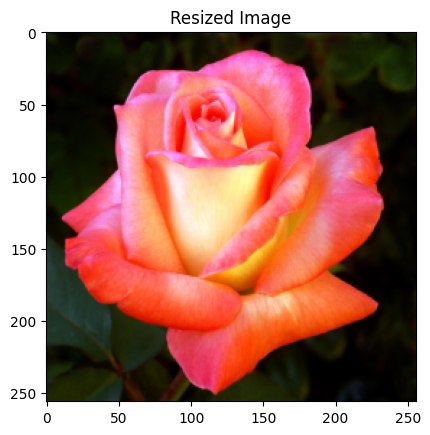

In [ ]:
# Image Resizing
resized = resize(image, (256, 256))
plt.imshow(resized)
plt.title("Resized Image")
plt.show()

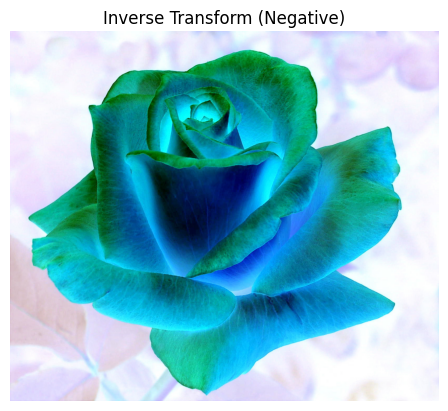

In [ ]:
inverse_image = cv2.bitwise_not(image)

plt.imshow(inverse_image)
plt.title("Inverse Transform (Negative)")
plt.axis("off")
plt.show()

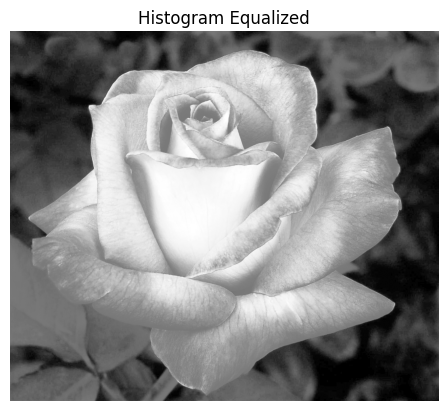

In [ ]:

gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
equalized = cv2.equalizeHist(gray_image)

plt.imshow(equalized, cmap='gray')
plt.title("Histogram Equalized")
plt.axis("off")
plt.show()

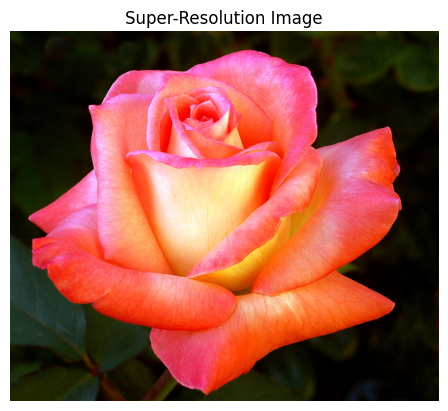

In [ ]:

scale_factor = 2  # Scale 2x
super_res = cv2.resize(image, None, fx=scale_factor, fy=scale_factor, interpolation=cv2.INTER_CUBIC)

plt.imshow(super_res)
plt.title("Super-Resolution Image")
plt.axis("off")
plt.show()


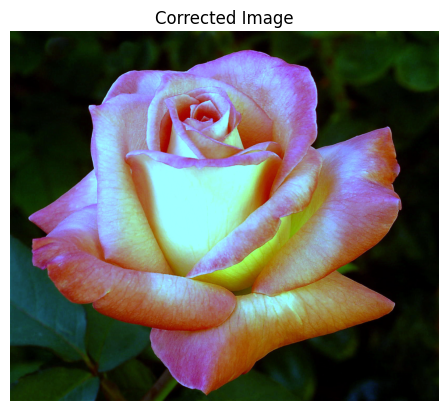

In [ ]:
avg_b, avg_g, avg_r = np.mean(image[:,:,0]), np.mean(image[:,:,1]), np.mean(image[:,:,2])
avg = (avg_b + avg_g + avg_r) / 3

# Adjust channels
image[:,:,0] = np.clip(image[:,:,0] * (avg / avg_b), 0, 255)
image[:,:,1] = np.clip(image[:,:,1] * (avg / avg_g), 0, 255)
image[:,:,2] = np.clip(image[:,:,2] * (avg / avg_r), 0, 255)

plt.imshow(image)
plt.title("Corrected Image")
plt.axis("off")
plt.show()

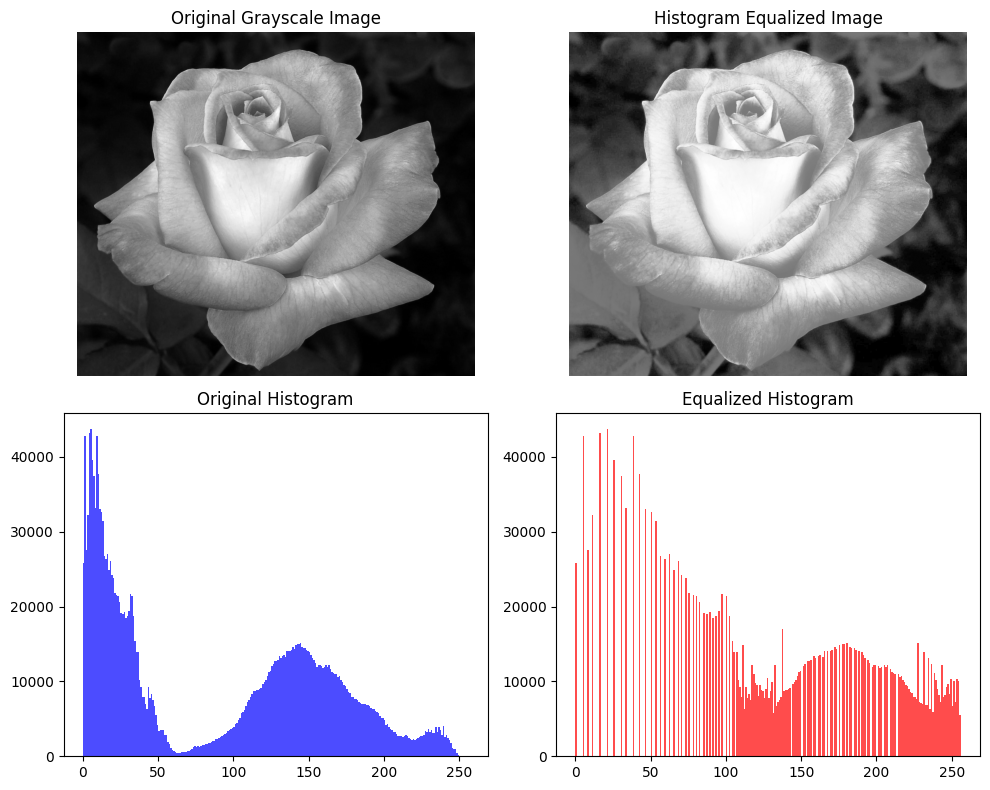

In [ ]:
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

hist_eq = cv2.equalizeHist(gray)

fig, axes = plt.subplots(2, 2, figsize=(10, 8))

axes[0, 0].imshow(gray, cmap='gray')
axes[0, 0].set_title("Original Grayscale Image")
axes[0, 0].axis("off")

axes[0, 1].imshow(hist_eq, cmap='gray')
axes[0, 1].set_title("Histogram Equalized Image")
axes[0, 1].axis("off")

axes[1, 0].hist(gray.ravel(), bins=256, range=[0, 256], color='blue', alpha=0.7)
axes[1, 0].set_title("Original Histogram")

axes[1, 1].hist(hist_eq.ravel(), bins=256, range=[0, 256], color='red', alpha=0.7)
axes[1, 1].set_title("Equalized Histogram")

plt.tight_layout()
plt.show()


In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import torchvision.models as models
import time
from sklearn.metrics import accuracy_score


# Data Preprocessing
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # input size
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize
])

# Load CIFAR-100 Dataset
trainset = torchvision.datasets.CIFAR100(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.CIFAR100(root='./data', train=False, download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=False, num_workers=2)

100%|██████████| 169M/169M [00:05<00:00, 29.2MB/s]


In [ ]:
# Pretrained Models
alexnet = models.alexnet(pretrained=True)
alexnet.classifier[6] = nn.Linear(4096, 100)

vgg16 = models.vgg16(pretrained=True)
vgg16.classifier[6] = nn.Linear(4096, 100)

# Unfreeze layers
for param in alexnet.features.parameters():
    param.requires_grad = True
for param in vgg16.features.parameters():
    param.requires_grad = True

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:01<00:00, 138MB/s]
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer_alex = optim.Adam(alexnet.parameters(), lr=0.000001)
optimizer_vgg = optim.Adam(vgg16.parameters(), lr=0.000001)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
alexnet.to(device)
vgg16.to(device)

def train_model(model, optimizer, num_epochs=10):
    model.train()
    start_time = time.time()
    for epoch in range(num_epochs):
        running_loss = 0.0
        for images, labels in trainloader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
        print(f"Epoch {epoch+1}, Loss: {running_loss / len(trainloader):.4f}")
    print("Training Time:", time.time() - start_time)

In [ ]:
print("Training AlexNet...")
train_model(alexnet, optimizer_alex)

Training AlexNet...
Epoch 1, Loss: 4.7077
Epoch 2, Loss: 4.7621
Epoch 3, Loss: 4.7218
Epoch 4, Loss: 4.7625
Epoch 5, Loss: 4.7386
Epoch 6, Loss: 4.7390
Epoch 7, Loss: 4.7193
Epoch 8, Loss: 4.7690
Epoch 9, Loss: 4.7182
Epoch 10, Loss: 4.7808
Training Time: 1071.466040611267


In [ ]:
print("Training Vgg16...")
train_model(vgg16, optimizer_vgg)
print("Training AlexNet...")

Training Vgg16...
Epoch 1, Loss: 4.4602
Epoch 2, Loss: 3.3930
Epoch 3, Loss: 2.7048
Epoch 4, Loss: 2.3320
Epoch 5, Loss: 2.0865
Epoch 6, Loss: 1.8968
Epoch 7, Loss: 1.7527
Epoch 8, Loss: 1.6359


In [ ]:
def evaluate_model(model):
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for images, labels in testloader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)
    return correct / total

alexnet_acc = evaluate_model(alexnet)
vgg16_acc = evaluate_model(vgg16)

print(f"AlexNet Accuracy: {alexnet_acc * 100:.2f}%")
print(f"VGG16 Accuracy: {vgg16_acc * 100:.2f}%")

In [ ]:

import matplotlib.pyplot as plt
import numpy as np

# Accuracy Comparison Bar Chart
models = ["AlexNet", "VGG16"]
accuracies = [alexnet_acc * 100, vgg16_acc * 100]

plt.figure(figsize=(6, 4))
plt.bar(models, accuracies, color=['blue', 'red'])
plt.ylabel("Accuracy (%)")
plt.title("Model Accuracy Comparison")
plt.ylim(0, 100)
plt.grid(axis="y", linestyle="--", alpha=0.7)

for i, acc in enumerate(accuracies):
    plt.text(i, acc + 1, f"{acc:.2f}%", ha="center", fontsize=12, fontweight="bold")

plt.show()

In [ ]:

import time

def measure_inference_time(model, model_name, testloader):
    model.eval()
    total_time = 0
    with torch.no_grad():
        for images, _ in testloader:
            images = images.to(device)
            start_time = time.time()
            _ = model(images)  # Forward pass
            total_time += (time.time() - start_time)
            break  # Measure time for just 1 batch

    avg_time = total_time / len(images)
    print(f"{model_name} - Inference Time per Image: {avg_time:.6f} seconds")

measure_inference_time(alexnet, "AlexNet", testloader)
measure_inference_time(vgg16, "VGG16", testloader)

In [ ]:
def count_parameters(model, model_name):
    total_params = sum(p.numel() for p in model.parameters())
    print(f"{model_name} - Total Parameters: {total_params / 1e6:.2f} Million")

count_parameters(alexnet, "AlexNet")
count_parameters(vgg16, "VGG16")